In [81]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import re
params={
        # 'axes.labelsize':20,
        # 'xtick.labelsize':'large',
        # 'ytick.labelsize':'large',
        'xtick.direction':'in',
        'ytick.direction':'in',
        'xtick.minor.visible':True,
        'ytick.minor.visible':True,
        'xtick.top':True,
        'ytick.right':True,
        'xtick.labeltop':False,
        'ytick.labelright':False,
        'xtick.labelbottom':True,
        'ytick.labelleft':True,
        # 'xtick.major.size':10,
        # 'ytick.major.size':10,
        # 'xtick.minor.size':5,
        # 'ytick.minor.size':5,
        # 'xtick.major.width':1.5,
        # 'ytick.major.width':1.5,
        # 'xtick.minor.width':1,
        # 'ytick.minor.width':1,
        # 'errorbar.capsize':3,
        # 'legend.fontsize':'xx-large',
        'font.family':'serif',
        'mathtext.default':'it',
        'figure.subplot.wspace':0}
plt.rcParams.update(params)
%matplotlib widget

def extract_number(s):
    return float(re.search(r'\d+\.?\d*', s).group())

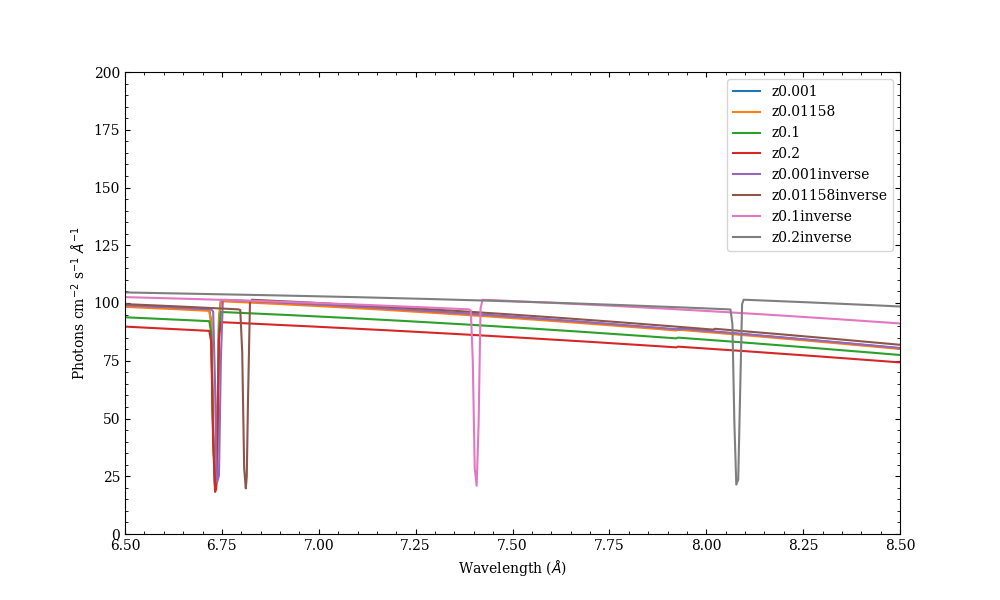

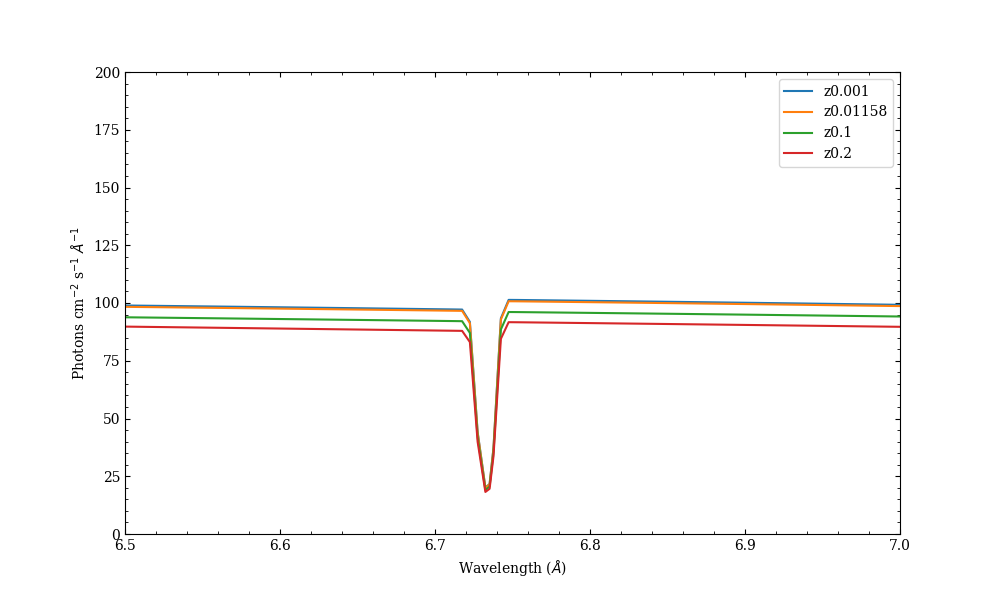

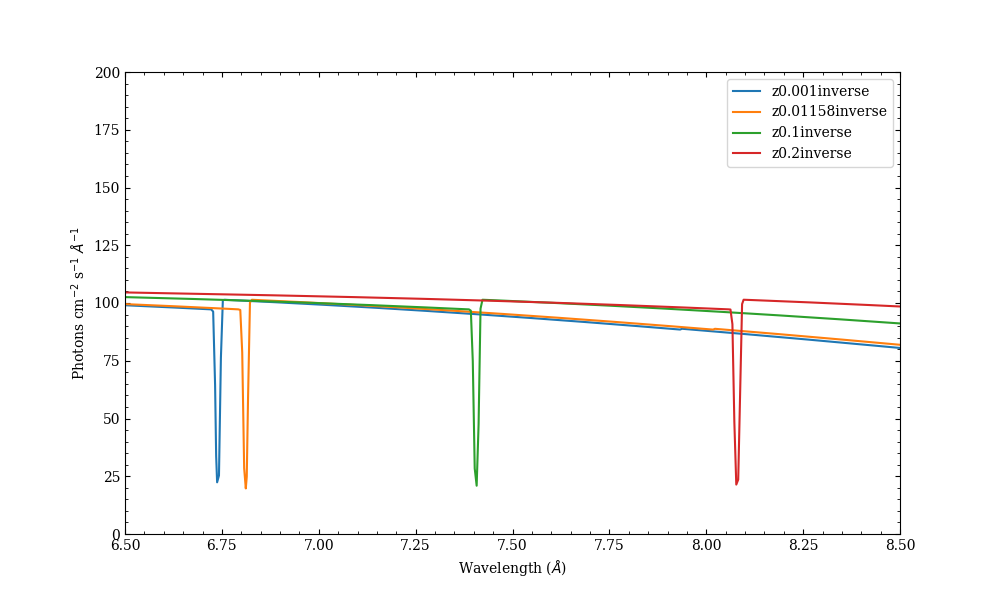

In [79]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/z_order'
filenames = os.listdir(folder_path)
inverse_filenames = [f for f in filenames if 'inverse' in f]
non_inverse_filenames = [f for f in filenames if 'inverse' not in f]
sorted_inverse_filenames = sorted(inverse_filenames, key=extract_number)
sorted_non_inverse_filenames = sorted(non_inverse_filenames, key=extract_number)
filenames = sorted_non_inverse_filenames + sorted_inverse_filenames
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.xlim(6.5,8.5)
# plt.xscale('log')
plt.ylim(0,2e2)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filename[:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order.png',dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(6.5,7)
plt.ylim(0,2e2)
for i in range(math.ceil(len(filenames)/2)):
    file_path = os.path.join(folder_path, filenames[i])
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filenames[i][:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order_non_inverse.png',dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.xlim(6.5,8.5)
plt.ylim(0,2e2)
for i in range(math.ceil(len(filenames)/2),len(filenames)):
    file_path = os.path.join(folder_path, filenames[i])
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label=filenames[i][:-4])
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
plt.savefig('Difference_z_order_inverse.png',dpi=300)
plt.show()

 
6.731 x + 0.001487


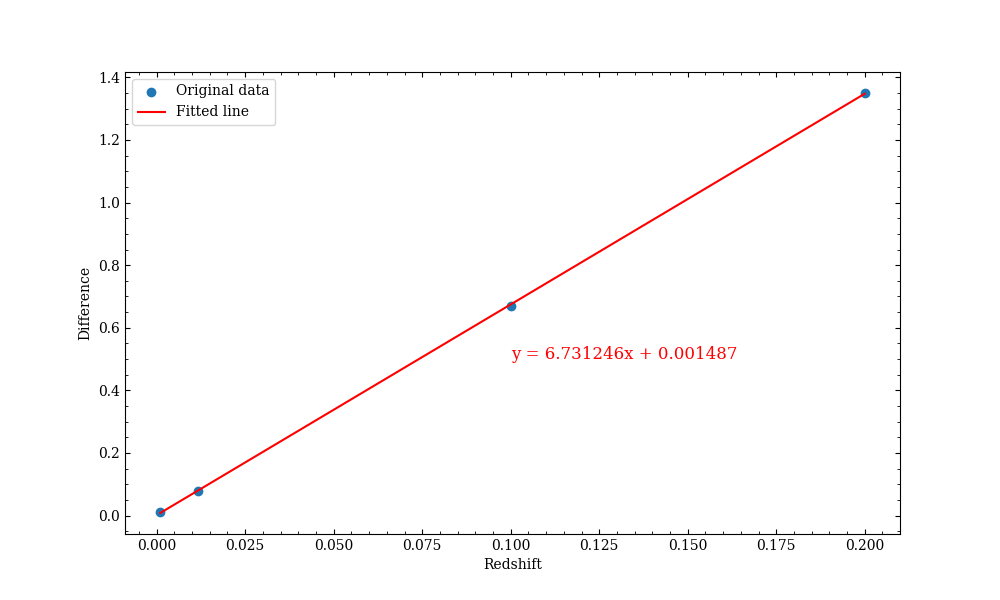

In [85]:
z = [0.001,0.01158,0.1,0.2]
delta = [0.01,0.08,0.67,1.35]

# 使用 numpy 的 polyfit 函数进行拟合，这里我们拟合一个一次多项式（线性拟合）
coefficients = np.polyfit(z, delta, 1)

# 使用 numpy 的 poly1d 函数得到多项式的表达式
polynomial = np.poly1d(coefficients)

# 打印多项式的表达式
print(polynomial)

# 生成拟合线的 x 和 y 坐标
z_fit = np.linspace(min(z), max(z), 100)
delta_fit = polynomial(z_fit)

# 绘制原始数据和拟合线
plt.figure(figsize=(10, 6))
plt.scatter(z, delta, label='Original data')
plt.plot(z_fit, delta_fit, color='red', label='Fitted line')
plt.text(0.1, 0.5, 'y = {:.6f}x + {:.6f}'.format(coefficients[0], coefficients[1]), fontsize=12, color='red')
plt.xlabel('Redshift')
plt.ylabel('Difference')
plt.legend()
plt.savefig('z_delta.png', dpi=300)
plt.show()

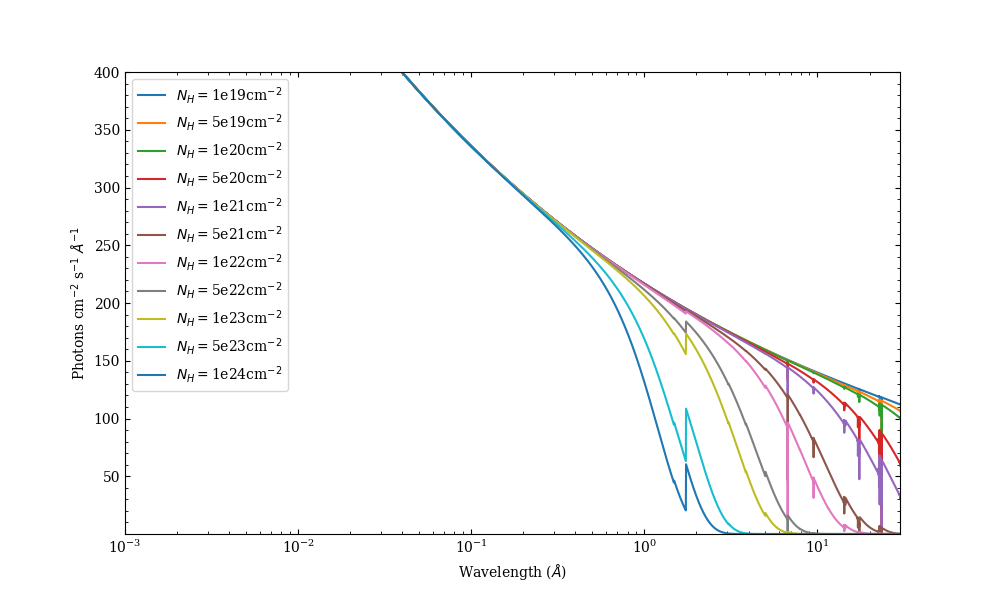

In [14]:
# 获取文件夹中所有文件的名称
folder_path = '/Users/joey/Documents/Codes/SPEX/pion/exercise3_JMao/ascii'
filenames = os.listdir(folder_path)
filenames = filenames[1:]
filenames = sorted(filenames, key=extract_number)
plt.figure(figsize=(10, 6))
# plt.yscale('log')
plt.xlim(1e-3,30)
plt.xscale('log')
plt.ylim(1e-3,400)
# 读取每个文件
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    data = np.genfromtxt(file_path, skip_header=4)
    x=data[:,0]
    y=data[:,3]
    plt.plot(x, y, label='$N_H=$'+filename[:-4]+'cm$^{-2}$')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photons cm$^{-2}$ s$^{-1}$ $\AA^{-1}$')
plt.legend()
# plt.savefig('Difference_NH.png',dpi=300)
plt.show()

In [47]:
print(filenames)

['.DS_Store', '1e19.qdp', '1e24.qdp', '1e23.qdp', '1e22.qdp', '1e20.qdp', '1e21.qdp', '5e22.qdp', '5e23.qdp', '5e21.qdp', '5e20.qdp', '5e19.qdp']
